# Trading Bot

Welcome to our trading bot for Dow Jones stocks. This bot helps you to earn a lot of money.  
Just follow the instructions. 

### Before we can start, we first have to import a few libraries

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from own_jupyter_controls import dropdown_widget, generate_file_path_for_stock_data, network_architecture_widget
from stock_pred import train_bot
from trading import trading
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Selecting stock
Please select the ticker symbol of the Dow Jones stock your interested in.
First run the cell. Then select the ticker symbol from the dropdown-menu, then run the next Cell.

In [2]:
widget = dropdown_widget()
display(widget)

interactive(children=(Dropdown(description='Symbol', options=('MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO'…

In [3]:
file_path = generate_file_path_for_stock_data(widget.kwargs['x'])
print("The file path to your data is '" + file_path + "'")

The file path to your data is 'data/daily_MSFT.csv'


## Predicting stock
Next we train a neural network to learn to predict the course development of our selected stock. 
<br>
<br>
But first we have to select the hyperparameters of our network!  

In [4]:
# Network hyperparameters
two_lstm_layers=False
number_of_neurons_lstm=50 # Only use integers
two_layers_second_branch=False
number_of_neurons_second_branch=20 # Only use integers
dropout_rate=0.2

# Feature parameters
history_points = 50 # Do not set below 50; Only use integers
s_and_p_500 = False 
ma7 = True
ma21 = True 
ma_his_window = True
ema12 = True 
ema26 = True 
mac = True 
ten_day_momentum = True
upper_bands = True 
lower_bands = True
volatilty_index_feature = True
fourier = 0 # 0 if you don't want to use the feature and only use integers
dollar_currency_index = False

# Training parameters
number_of_epochs = 50

In [5]:
error, values_original, values_predicted, ohlcv_test, tech_ind_test, model, y_normaliser = train_bot(file_path=file_path, 
                                                                                                     history_points=history_points, 
                                                                                                     number_of_epochs=number_of_epochs, 
                                                                                                     two_lstm_layers=two_lstm_layers, 
                                                                                                     number_of_neurons_lstm=number_of_neurons_lstm,
                                                                                                     two_layers_second_branch=two_layers_second_branch, 
                                                                                                     number_of_neurons_second_branch=number_of_neurons_second_branch, 
                                                                                                     dropout_rate=dropout_rate, 
                                                                                                     s_and_p_500=s_and_p_500, 
                                                                                                     ma7=ma7, 
                                                                                                     ma21=ma21, 
                                                                                                     ma_his_window=ma_his_window, 
                                                                                                     ema12=ema12, 
                                                                                                     ema26=ema26, 
                                                                                                     mac=mac, 
                                                                                                     ten_day_momentum=ten_day_momentum,
                                                                                                     upper_bands=upper_bands, 
                                                                                                     lower_bands=lower_bands,
                                                                                                     volatilty_index_feature=volatilty_index_feature,
                                                                                                     fourier=fourier,
                                                                                                     dollar_currency_index=dollar_currency_index)

Start csv_to_dataset
    timestamp    open    high     low   close    volume
0  2019-10-31  144.90  144.93  142.99  143.37  24489475
1  2019-10-30  143.52  145.00  142.79  144.61  18471700
2  2019-10-29  144.08  144.50  142.65  142.83  20519700
3  2019-10-28  144.40  145.67  143.51  144.19  35243000
4  2019-10-25  139.34  141.14  139.20  140.73  25274600
(5033, 6)
Before reordering
    timestamp    open    high     low   close    volume  Vol_Index
0  2019-10-25  139.34  141.14  139.20  140.73  25274600      12.65
1  2019-10-24  139.39  140.42  138.67  139.94  37029300      13.71
2  2019-10-23  136.88  137.45  135.61  137.24  29844600      14.01
3  2019-10-22  138.97  140.01  136.26  136.37  27431000      14.46
4  2019-10-21  138.45  138.50  137.01  138.43  20078200      14.00
(5029, 7)
After reordering
       timestamp    open    high     low   close    volume  Vol_Index
5028  1999-11-01  93.250  94.188  92.125  92.375  53261200      22.09
5027  1999-11-02  92.750  94.500  91.938  92.5

### The error of our network

In [8]:
print("The Mean-squared error of our network on the test set is " + "{:10.3f}".format(error))

The Mean-squared error of our network on the test set is      3.756


#### Plot of our network's performance on the test set

In [ ]:
plt.gcf().set_size_inches(22, 15, forward=True)
real = plt.plot(values_original, label='real')
pred = plt.plot(values_predicted, label='predicted')
plt.legend(['Real', 'Predicted'])
# Delete the comment to save the plot
save_string = str(widget.kwargs['x']) + '.png'
plt.savefig(save_string)
plt.show()

## Trading stock
With the predictions working we can trade stock. Let's see how our bot would have performed on the test set when trading stock.

In [6]:
buys, sells = trading(ohlcv_test, tech_ind_test, y_normaliser, model)

The numbers of buys and sells that our bot would have taken
buys: 363
sells: 60
The money our bot would have earned
earnings: $854.6798751364822


#### Let's plot our bot's trading patterns

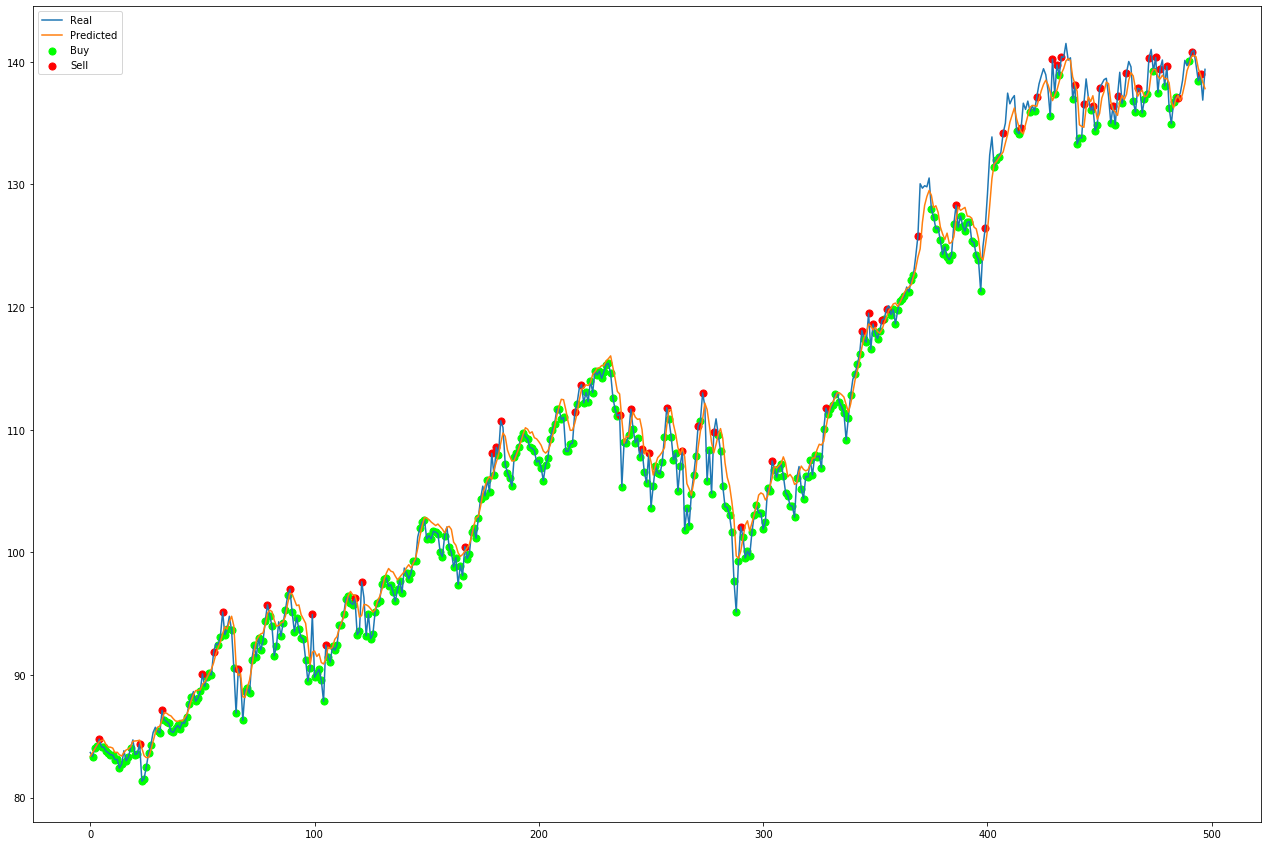

In [7]:
plt.gcf().set_size_inches(22, 15, forward=True)
real = plt.plot(values_original, label='real')
pred = plt.plot(values_predicted, label='predicted')
if len(buys) > 0:
    plt.scatter(list(list(zip(*buys))[0]), list(list(zip(*buys))[1]), c='#00ff00', s=50)
if len(sells) > 0:
    plt.scatter(list(list(zip(*sells))[0]), list(list(zip(*sells))[1]), c='#ff0000', s=50)
# real = plt.plot(unscaled_y[start:end], label='real')
# pred = plt.plot(y_predicted[start:end], label='predicted')
plt.legend(['Real', 'Predicted', 'Buy', 'Sell'])
# Delete the comment to save the plot
save_string = str(widget.kwargs['x']) + '.png'
plt.savefig(save_string)
plt.show()